In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [19]:
import os
os.chdir('/content/drive/My Drive/Kaggle/Image Processing Project')
!ls

 Image_processing.ipynb  'Paper 1.pdf'	 sample2.jfif   sample_image.jfif


#Converting the image to Grayscale

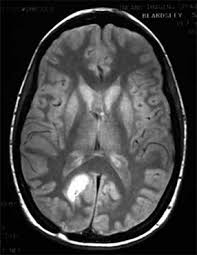

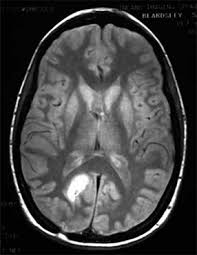

In [20]:
import cv2
from google.colab.patches import cv2_imshow
image = cv2.imread('sample2.jfif')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

cv2_imshow(image)
print('\t')
cv2_imshow(gray)

#Using Sobel Operation for Edge Detection

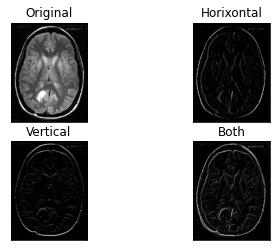

In [21]:
edgesx = cv2.Sobel(gray, -1, dx = 1, dy = 0, ksize = 1, scale = 1, delta = 0, borderType = cv2.BORDER_DEFAULT)
edgesy = cv2.Sobel(gray, -1, dx = 0, dy = 1, ksize = 1, scale = 1, delta = 0, borderType = cv2.BORDER_DEFAULT)
edges = edgesx + edgesy

output = [gray, edgesx, edgesy, edges]
titles = ['Original', 'Horixontal', 'Vertical', 'Both']

for i in range(4):
  plt.subplot(2, 2, i+1)
  plt.imshow(output[i], cmap = 'gray')
  plt.title(titles[i])
  plt.xticks([])
  plt.yticks([])
plt.show()

#Using Laplacian for Edge Detection

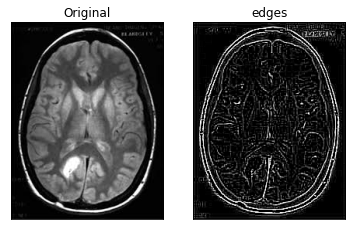

In [24]:
edges = cv2.Laplacian(gray, -1, ksize = 3, scale = 1, delta = 0, borderType = cv2.BORDER_DEFAULT)
output = [gray, edges]
import matplotlib.pyplot as plt

titles = ['Original', 'edges']

for i in range(2):
  plt.subplot(1, 2, i+1)
  plt.imshow(output[i], cmap = 'gray')
  plt.title(titles[i])
  plt.xticks([])
  plt.yticks([])
plt.show()


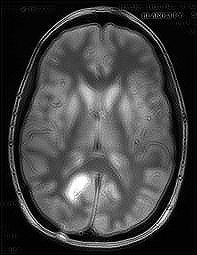

In [69]:
# edges = cv2.Laplacian(gray, -1, ksize = 7, scale = 1, delta = 0, borderType = cv2.BORDER_DEFAULT)
edges = cv2.Laplacian(gray, cv2.CV_64F)
cv2_imshow(edges+gray)

#Applying Gaussian High Pass filter

In [0]:
from scipy import ndimage
import numpy as np

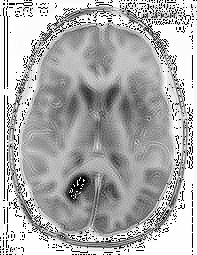

In [59]:
kernel = np.array([[0, -1, 0],
                   [-1,  3, -1],
                   [0, -1, 0]])

highpass = ndimage.convolve(gray, kernel)

cv2_imshow(highpass)

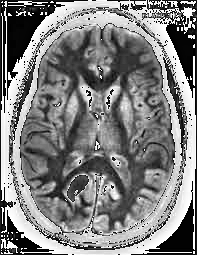

In [60]:
lowpass = ndimage.gaussian_filter(gray, 7)
gauss_highpass = gray - lowpass
# plot(gauss_highpass, r'Gaussian Highpass, $\sigma = 3 pixels$')
# plt.show()
cv2_imshow(gauss_highpass)